In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [3]:
# Load the datasets
application_train = pd.read_csv('application_train.csv')
titanic = pd.read_csv('titanic.csv')


In [4]:
# Function to preprocess a dataset
def preprocess_dataset(df):
    # Handling missing values
    num_imputer = SimpleImputer(strategy='median')
    cat_imputer = SimpleImputer(strategy='most_frequent')
    
    df_num = df.select_dtypes(include=['int64', 'float64'])
    df_cat = df.select_dtypes(include=['object'])
    
    df_num = pd.DataFrame(num_imputer.fit_transform(df_num), columns=df_num.columns)
    df_cat = pd.DataFrame(cat_imputer.fit_transform(df_cat), columns=df_cat.columns)
    
    # Encoding categorical variables
    label_encoders = {}
    for col in df_cat.columns:
        le = LabelEncoder()
        df_cat[col] = le.fit_transform(df_cat[col])
        label_encoders[col] = le
    
    # Merging the processed numerical and categorical features
    df_processed = pd.concat([df_num, df_cat], axis=1)
    
    # Feature Scaling
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_processed), columns=df_processed.columns)
    
    return df_scaled

# Preprocess both datasets
application_train_processed = preprocess_dataset(application_train)
titanic_processed = preprocess_dataset(titanic)

# Save the processed datasets
application_train_processed.to_csv('application_train_processed.csv', index=False)
titanic_processed.to_csv('titanic_processed.csv', index=False)

# Visualize the data

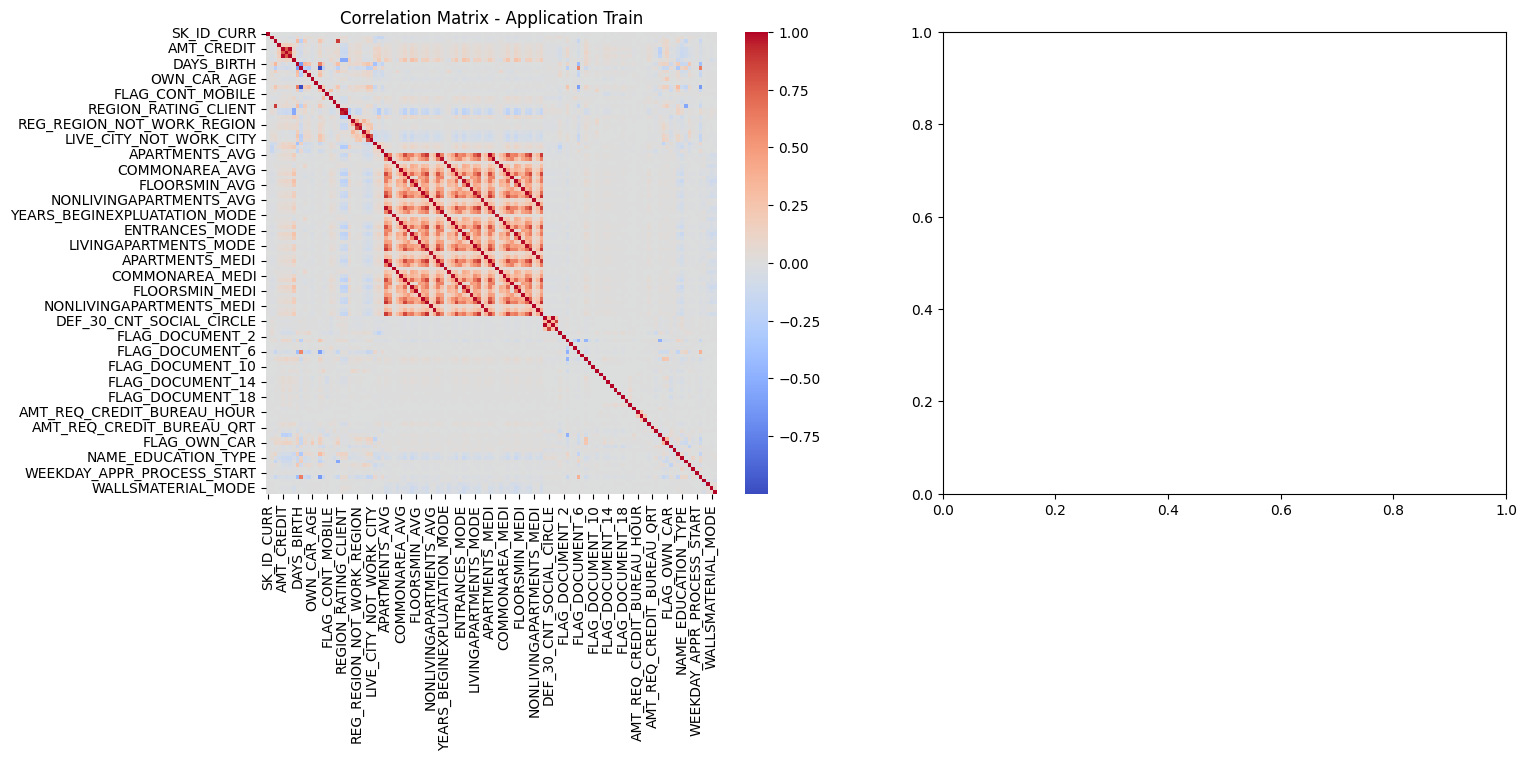

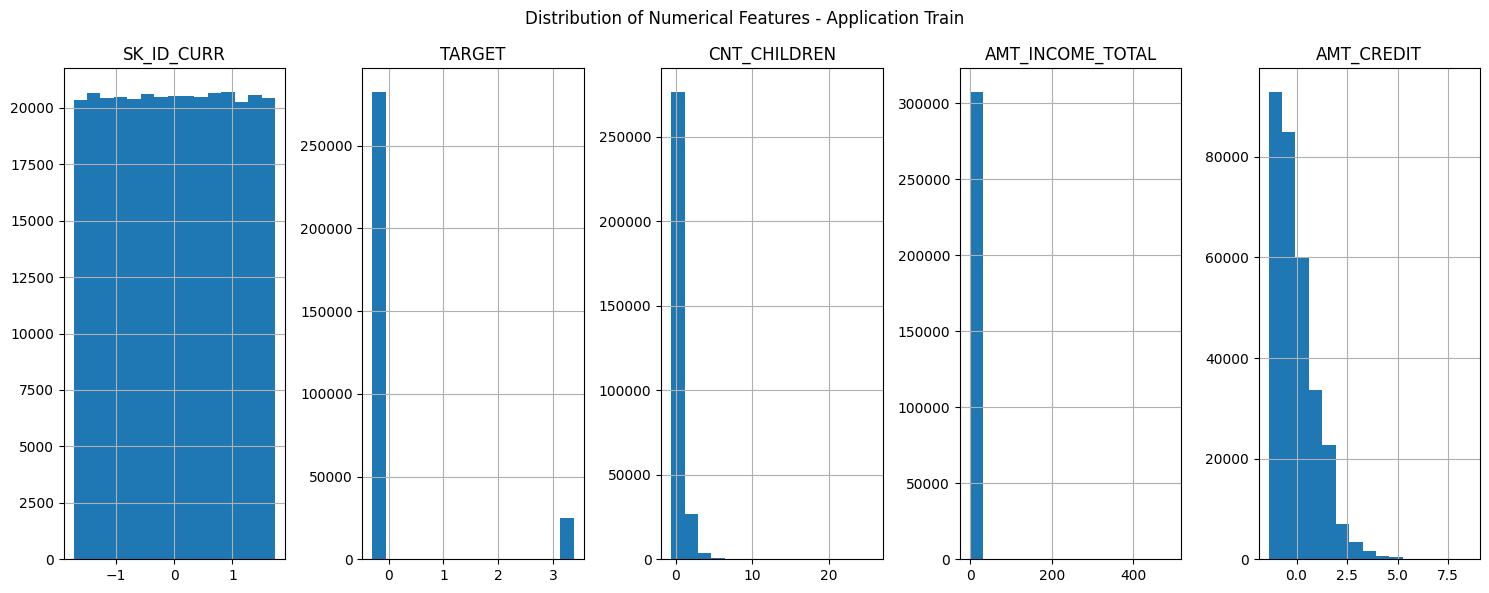

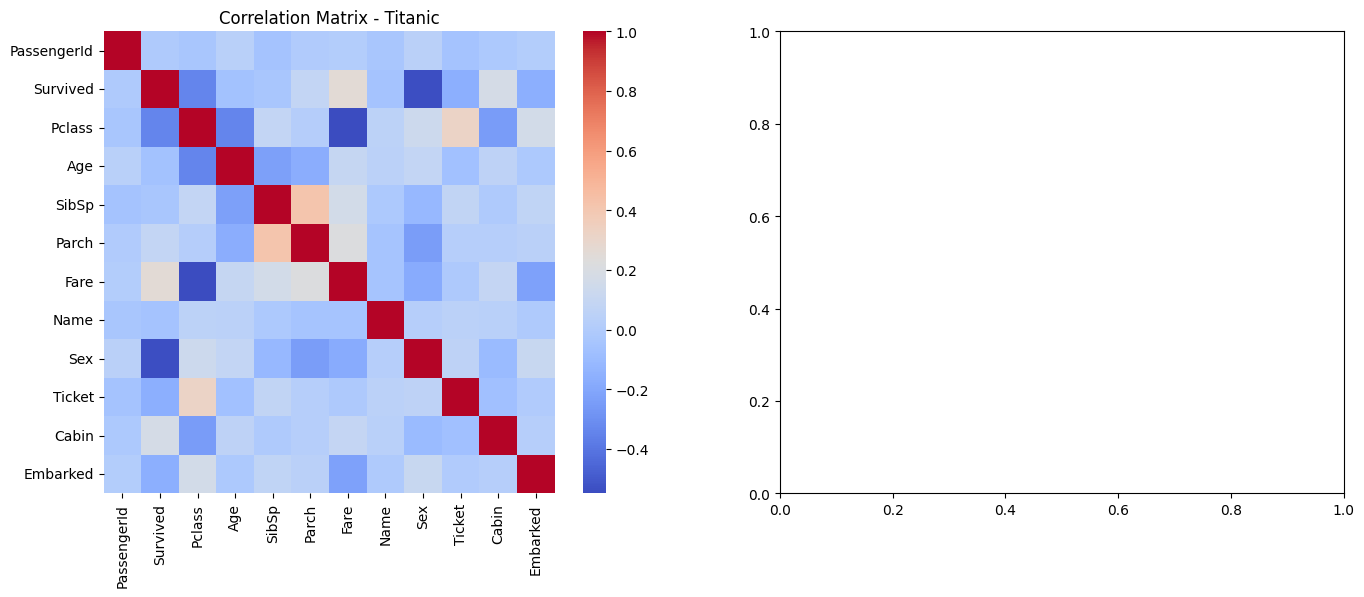

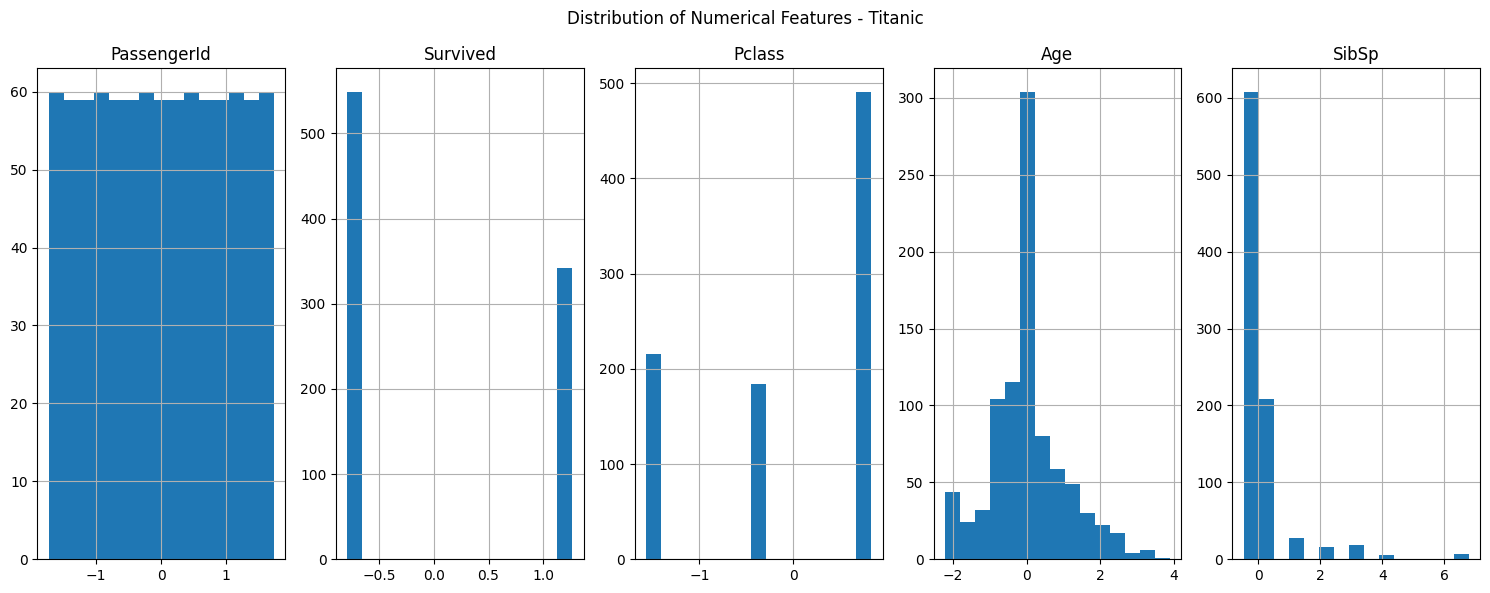

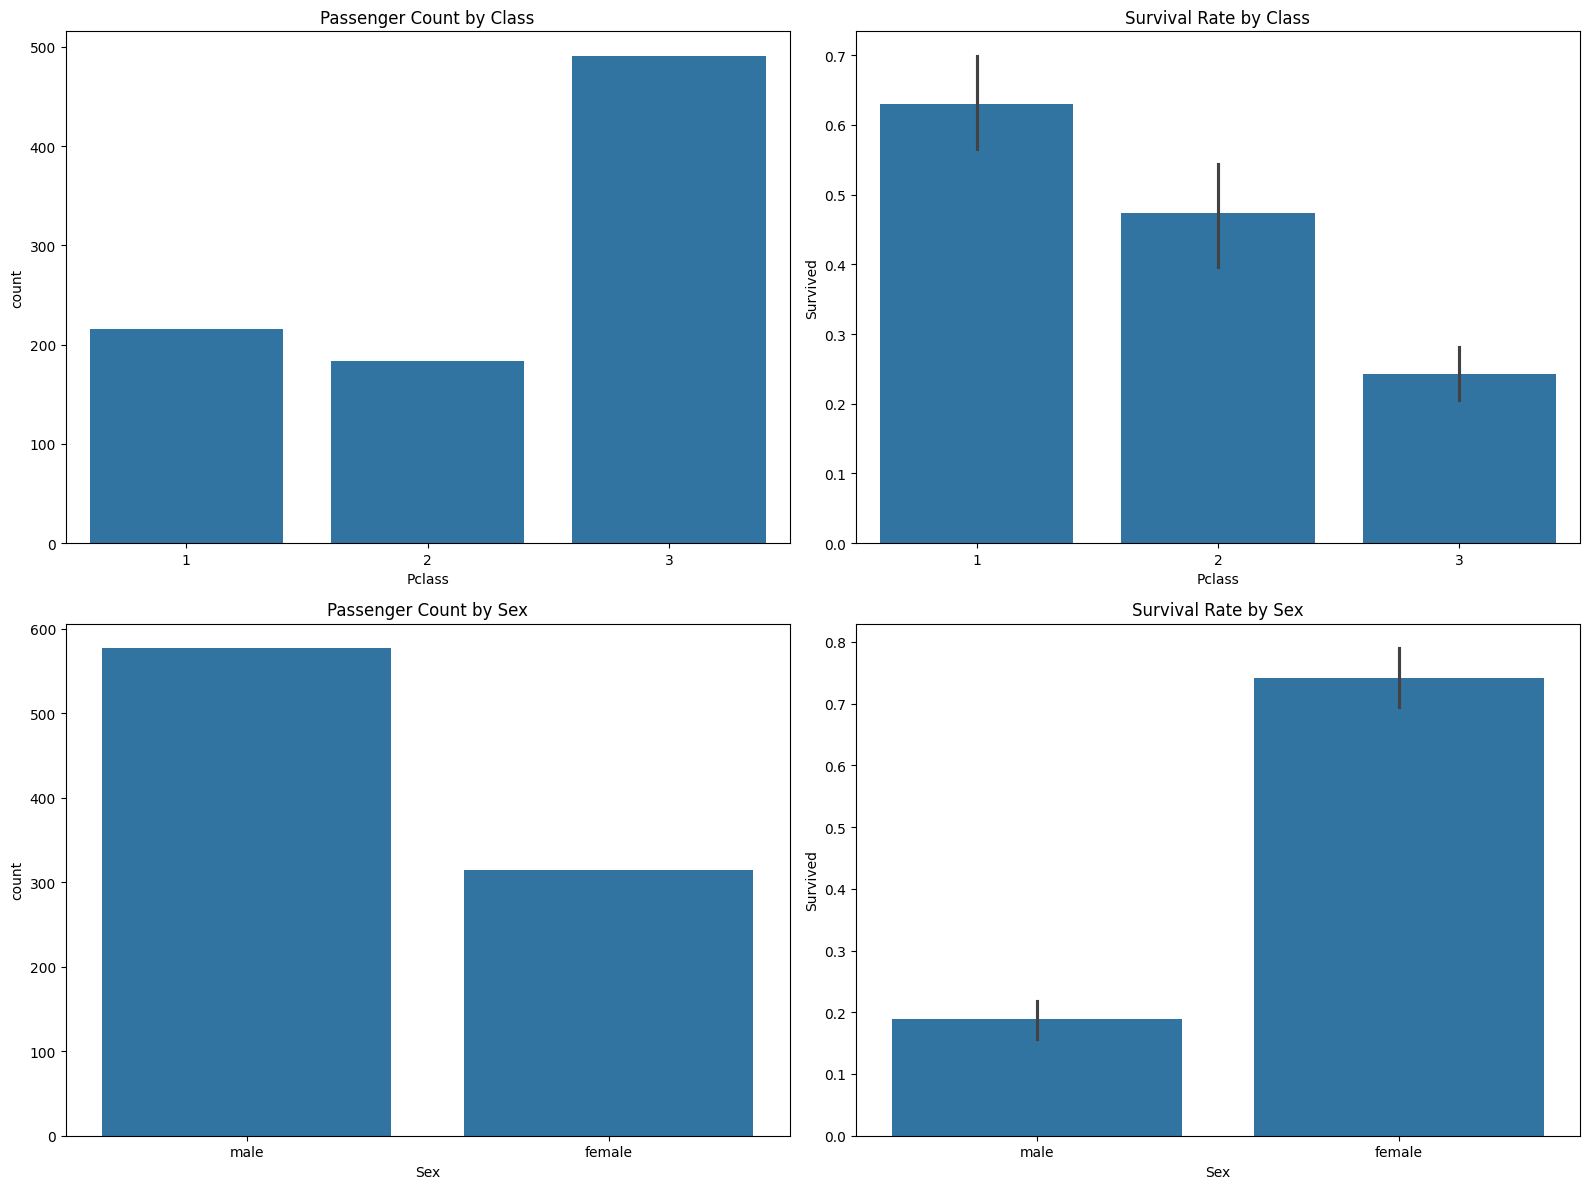

In [5]:
def visualize_data(df, title):
    plt.figure(figsize=(16, 6))
    
    # Correlation matrix
    plt.subplot(1, 2, 1)
    corr = df.corr()
    sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f")
    plt.title(f'Correlation Matrix - {title}')
    
    # Distribution of first few numerical features
    plt.subplot(1, 2, 2)
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns[:5]
    df[num_cols].hist(bins=15, figsize=(15, 6), layout=(1, len(num_cols)))
    plt.suptitle(f'Distribution of Numerical Features - {title}')
    
    plt.tight_layout()
    plt.show()

# Visualize both processed datasets
visualize_data(application_train_processed, 'Application Train')
visualize_data(titanic_processed, 'Titanic')

# Additional visualizations for titanic dataset
def visualize_titanic(df):
    plt.figure(figsize=(16, 12))

    # Count of passengers by class
    plt.subplot(2, 2, 1)
    sns.countplot(x='Pclass', data=df)
    plt.title('Passenger Count by Class')

    # Survival rate by class
    plt.subplot(2, 2, 2)
    sns.barplot(x='Pclass', y='Survived', data=df)
    plt.title('Survival Rate by Class')

    # Count of passengers by sex
    plt.subplot(2, 2, 3)
    sns.countplot(x='Sex', data=df)
    plt.title('Passenger Count by Sex')

    # Survival rate by sex
    plt.subplot(2, 2, 4)
    sns.barplot(x='Sex', y='Survived', data=df)
    plt.title('Survival Rate by Sex')

    plt.tight_layout()
    plt.show()

# Load the original Titanic dataset for visualizations
titanic = pd.read_csv('titanic.csv')
visualize_titanic(titanic)